# 0.1 Process data

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Libraries

In [17]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import final_project.visualization.visualize as visualize

## Explore data

### Read data

In [18]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182560 entries, 0 to 182559
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  182560 non-null  object
 1   date            182560 non-null  object
 2   value           182560 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [20]:
sns.set_style("whitegrid")

processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

### Appearance of new covid-19 cases in Latam

Subset data.

In [21]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
6,Argentina,2020-01-22,0
30,Brazil,2020-01-22,0
57,Chile,2020-01-22,0


### Ploting and visualizing data

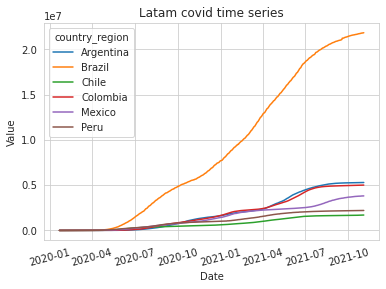

In [22]:
visualize.covid_time_series(some_latam_countries_df)

In [23]:
visualize.top_countries(processed_covid_df, countries,11)

,country_region,value,color
0,US,12121393193,lightblue
1,India,8292123869,lightblue
2,Brazil,5814374352,red
3,Russia,1962056598,lightblue
4,France,1882800988,lightblue
5,United Kingdom,1804381811,lightblue
6,Turkey,1613367050,lightblue
7,Spain,1358747941,lightblue
8,Italy,1342417394,lightblue
9,Argentina,1277564288,red


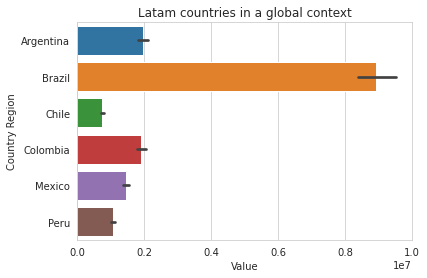

In [24]:
visualize.covid_bar_chart(some_latam_countries_df)